   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.6/1.6 MB 27.0 MB/s eta 0:00:00
Por favor, sube una imagen para procesar.


Saving Test_Image.png to Test_Image.png


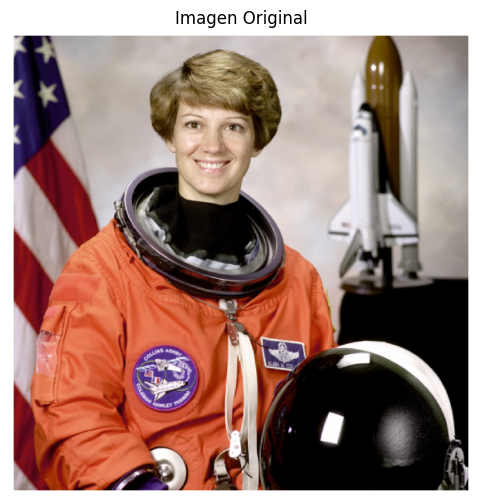

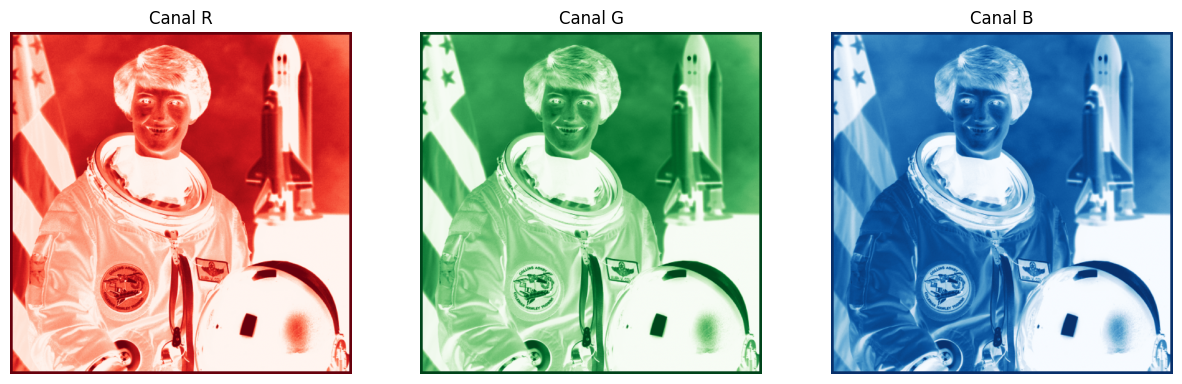

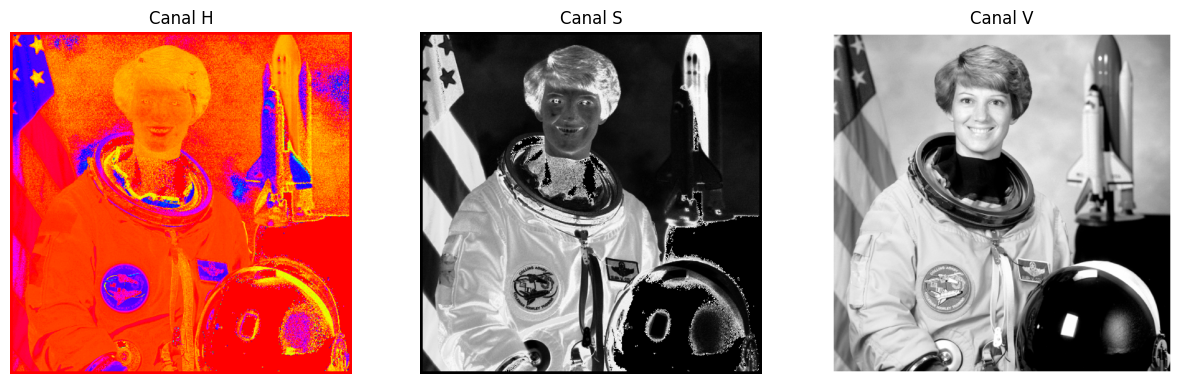

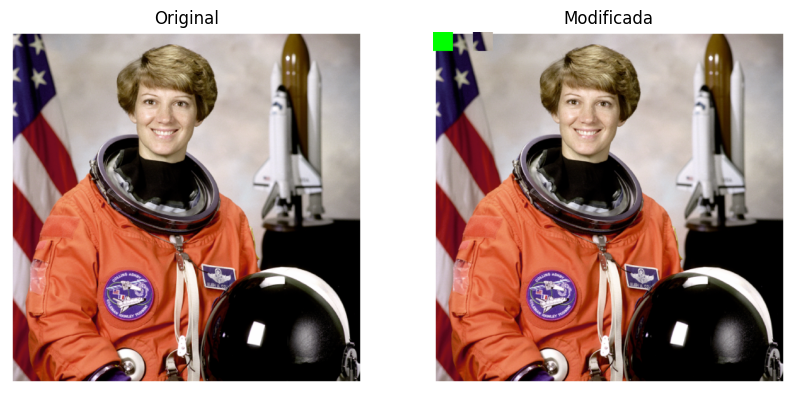

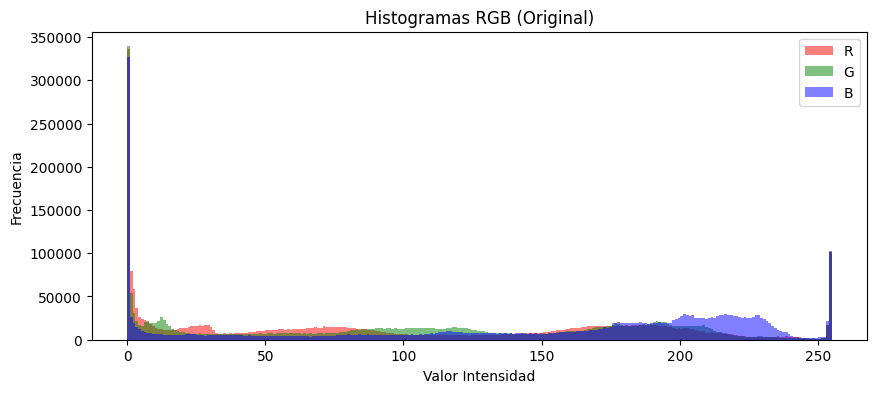

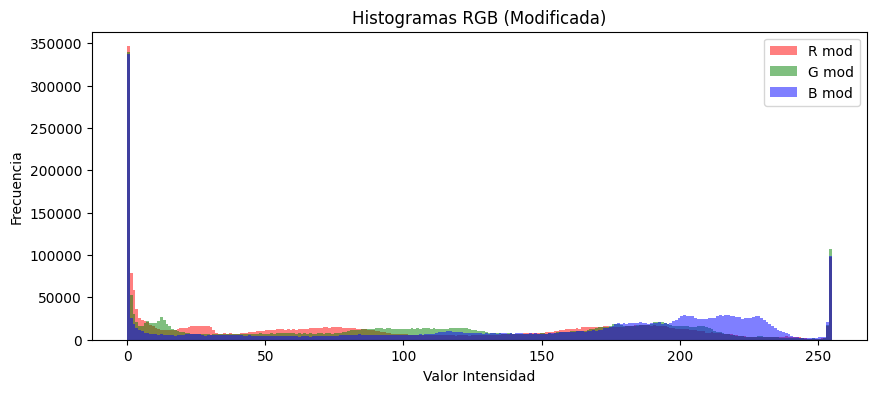

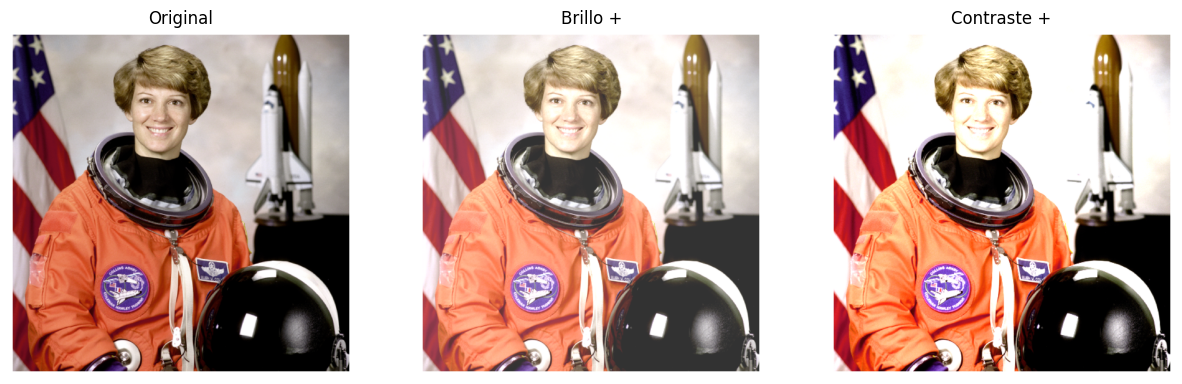

Ajusta brillo y contraste de la imagen con los sliders interactivos:


interactive(children=(IntSlider(value=0, description='brillo', min=-100, step=10), FloatSlider(value=1.0, desc…

Descargando imagen modificada...


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

In [ ]:
# Ejercicio 4 — Imagen = Matriz (Canales, Slicing, Histogramas)

# Paso 1: Instalar librerías necesarias
!pip install opencv-python numpy matplotlib ipywidgets --quiet

# Paso 2: Importar librerías
import cv2
import numpy as np
import matplotlib.pyplot as plt
from google.colab import files
from ipywidgets import interact, IntSlider

# Paso 3: Subir la imagen
print("Por favor, sube una imagen para procesar.")
uploaded = files.upload()
img_path = list(uploaded.keys())[0]
img = cv2.imread(img_path)

if img is None:
    raise ValueError("No se pudo cargar la imagen. Asegúrate de subir un archivo válido.")

img_rgb = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)

plt.figure(figsize=(6,6))
plt.imshow(img_rgb)
plt.title('Imagen Original')
plt.axis('off')
plt.show()

# Paso 4: Separar canales RGB y HSV
R, G, B = cv2.split(img)
plt.figure(figsize=(15,5))
plt.subplot(1,3,1); plt.imshow(R, cmap='Reds'); plt.title('Canal R'); plt.axis('off')
plt.subplot(1,3,2); plt.imshow(G, cmap='Greens'); plt.title('Canal G'); plt.axis('off')
plt.subplot(1,3,3); plt.imshow(B, cmap='Blues'); plt.title('Canal B'); plt.axis('off')
plt.show()

img_hsv = cv2.cvtColor(img, cv2.COLOR_BGR2HSV)
H, S, V = cv2.split(img_hsv)
plt.figure(figsize=(15,5))
plt.subplot(1,3,1); plt.imshow(H, cmap='hsv'); plt.title('Canal H'); plt.axis('off')
plt.subplot(1,3,2); plt.imshow(S, cmap='gray'); plt.title('Canal S'); plt.axis('off')
plt.subplot(1,3,3); plt.imshow(V, cmap='gray'); plt.title('Canal V'); plt.axis('off')
plt.show()

# Paso 5: Edición de regiones por slicing (cambiar color y copiar/pegar)
img_mod = img.copy()
h, w = img.shape[:2]
# Cambiar esquina superior izquierda a verde (ajusta tamaño según imagen)
img_mod[0:min(100,h), 0:min(100,w)] = [0, 255, 0]

# Copiar una región y pegarla en otra parte (ajusta para imágenes pequeñas)
if h > 250 and w > 300:
    region = img[150:250, 150:250].copy()
    img_mod[0:100, min(200,w-100):min(300,w)] = region

plt.figure(figsize=(10,5))
plt.subplot(1,2,1); plt.imshow(img_rgb); plt.title('Original'); plt.axis('off')
plt.subplot(1,2,2); plt.imshow(cv2.cvtColor(img_mod, cv2.COLOR_BGR2RGB)); plt.title('Modificada'); plt.axis('off')
plt.show()

# Paso 6: Histogramas de intensidades RGB antes y después
plt.figure(figsize=(10,4))
plt.hist(R.ravel(), bins=256, color='red', alpha=0.5, label='R')
plt.hist(G.ravel(), bins=256, color='green', alpha=0.5, label='G')
plt.hist(B.ravel(), bins=256, color='blue', alpha=0.5, label='B')
plt.title('Histogramas RGB (Original)')
plt.xlabel('Valor Intensidad')
plt.ylabel('Frecuencia')
plt.legend()
plt.show()

R_mod, G_mod, B_mod = cv2.split(img_mod)
plt.figure(figsize=(10,4))
plt.hist(R_mod.ravel(), bins=256, color='red', alpha=0.5, label='R mod')
plt.hist(G_mod.ravel(), bins=256, color='green', alpha=0.5, label='G mod')
plt.hist(B_mod.ravel(), bins=256, color='blue', alpha=0.5, label='B mod')
plt.title('Histogramas RGB (Modificada)')
plt.xlabel('Valor Intensidad')
plt.ylabel('Frecuencia')
plt.legend()
plt.show()

# Paso 7: Brillo y contraste (manual y con sliders)
img_brillo = cv2.convertScaleAbs(img, alpha=1, beta=50)   # beta = brillo
img_contraste = cv2.convertScaleAbs(img, alpha=1.5, beta=0)  # alpha = contraste

plt.figure(figsize=(15,5))
plt.subplot(1,3,1); plt.imshow(img_rgb); plt.title('Original'); plt.axis('off')
plt.subplot(1,3,2); plt.imshow(cv2.cvtColor(img_brillo, cv2.COLOR_BGR2RGB)); plt.title('Brillo +'); plt.axis('off')
plt.subplot(1,3,3); plt.imshow(cv2.cvtColor(img_contraste, cv2.COLOR_BGR2RGB)); plt.title('Contraste +'); plt.axis('off')
plt.show()

print("Ajusta brillo y contraste de la imagen con los sliders interactivos:")

def ajustar_brillo_contraste(brillo=0, contraste=1.0):
    resultado = cv2.convertScaleAbs(img, alpha=contraste, beta=brillo)
    plt.figure(figsize=(6,6))
    plt.imshow(cv2.cvtColor(resultado, cv2.COLOR_BGR2RGB))
    plt.title(f'Brillo={brillo}, Contraste={contraste}')
    plt.axis('off')
    plt.show()

interact(ajustar_brillo_contraste, brillo=IntSlider(min=-100, max=100, step=10, value=0), contraste=(0.5, 3.0, 0.1))

# Paso 8: Guardar imagen modificada
cv2.imwrite('imagen_modificada.jpg', img_mod)
# Descargar la imagen modificada si se desea
print("Descargando imagen modificada...")
files.download('imagen_modificada.jpg')